# BED File Fragment Length Analysis

This notebook processes a BED file (in gzipped format) to analyze fragment lengths. It calculates statistics and generates a normalized fragment length distribution plot.

## Import Required Libraries

In [3]:
import gzip
import matplotlib.pyplot as plt
from collections import Counter
import os

## Define Input File Path

In [5]:
bed_file = 'query.bed.gz'

if not os.path.exists(bed_file):
    print(f"Error: File {bed_file} not found.")
    exit(1)

## Define Function to Process BED File

In [7]:
def process_bed_file(file_path):
    fragment_lengths = []
    
    try:
        with gzip.open(file_path, 'rt') as f:
            for line in f:
                if line.startswith('#'):
                    continue
                    
                columns = line.strip().split('\t')
                
                if len(columns) >= 3:
                    try:
                        start = int(columns[1])
                        end = int(columns[2])
                        fragment_length = end - start
                        
                        if fragment_length > 0:
                            fragment_lengths.append(fragment_length)
                    except ValueError:
                        continue
    except Exception as e:
        print(f"Error processing file: {e}")
        exit(1)
    
    return fragment_lengths

## Process the BED File

In [9]:
print(f"Processing {bed_file}...")
fragment_lengths = process_bed_file(bed_file)

if not fragment_lengths:
    print("No valid fragment lengths found in the file.")
    exit(1)

print(f"Found {len(fragment_lengths)} valid fragments.")

Processing query.bed.gz...
Found 13835737 valid fragments.


## Calculate Fragment Length Distribution

In [11]:
fragment_counts = Counter(fragment_lengths)

total_count = sum(fragment_counts.values())

normalized_counts = {length: count/total_count for length, count in fragment_counts.items()}

sorted_lengths = sorted(normalized_counts.keys())
sorted_normalized_counts = [normalized_counts[length] for length in sorted_lengths]

## Create and Display the Plot

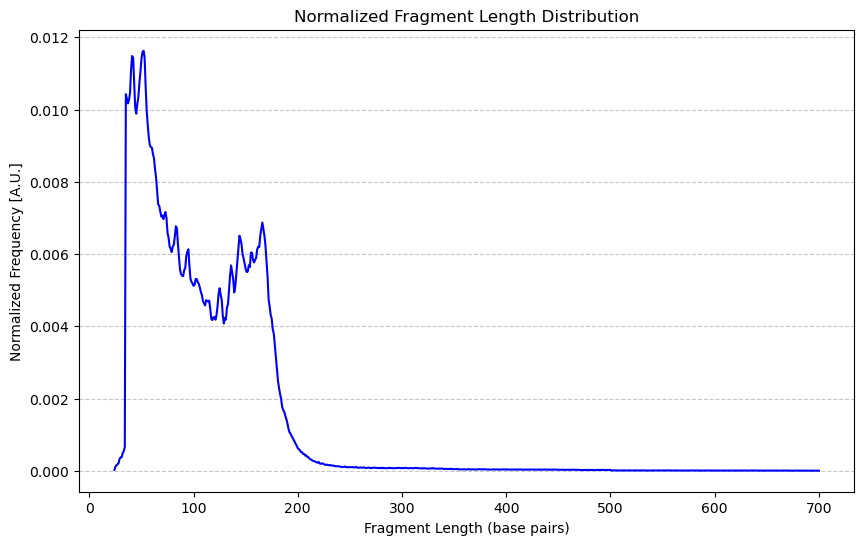

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_lengths, sorted_normalized_counts, color='blue')
plt.xlabel('Fragment Length (base pairs)')
plt.ylabel('Normalized Frequency [A.U.]')
plt.title('Normalized Fragment Length Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()